# Getting real about Fake News | Kaggle

Link: [https://www.kaggle.com/mrisdal/fake-news](https://www.kaggle.com/mrisdal/fake-news)

This jupyter notebook covers descriptive analysis of **Getting real about Fake News | Kaggle** dataset. 

## Attributes

* **uuid** - unique identifier
* **ord_in_thread**
* **author** - author of story
* **published** - date published
* **title** - title of the story
* **text** - text of story
* **language** - data from webhose.io
* **crawled** - date the story was archived
* **site_url** - site URL from [BS detector](https://github.com/bs-detector/bs-detector/blob/dev/ext/data/data.json)
* **country** - data from webhose.io
* **domain_rank** - data from webhose.io
* **thread_title**
* **spam_score** - data from webhose.io
* **main_img_url** - image from story
* **replies_count** - number of replies
* **participants_count** - number of participants
* **likes** - number of Facebook likes
* **comments** - number of Facebook comments
* **shares** - number of Facebook shares
* **type** - type of website (label from [BS detector](https://github.com/bs-detector/bs-detector/blob/dev/ext/data/data.json))


## Setup and import libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [18]:
df = pd.read_csv('data/data.csv')

## Analysis

### Count of records

In [19]:
len(df)

12999

### Data examples

Train data:

In [20]:
df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


### More information about data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
uuid                  12999 non-null object
ord_in_thread         12999 non-null int64
author                10575 non-null object
published             12999 non-null object
title                 12319 non-null object
text                  12953 non-null object
language              12999 non-null object
crawled               12999 non-null object
site_url              12999 non-null object
country               12823 non-null object
domain_rank           8776 non-null float64
thread_title          12987 non-null object
spam_score            12999 non-null float64
main_img_url          9356 non-null object
replies_count         12999 non-null int64
participants_count    12999 non-null int64
likes                 12999 non-null int64
comments              12999 non-null int64
shares                12999 non-null int64
type                  12999 non-null object
dtypes: float64(2

In [22]:
df.describe(include='all')

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
count,12999,12999.000000,10575,12999,12319,12953,12999,12999,12999,12823,8776.000000,12987,12999.000000,9356,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999
unique,12999,NaN,2259,11973,11698,12431,16,12997,244,24,NaN,11788,NaN,7684,NaN,NaN,NaN,NaN,NaN,8
top,302d5bd33ae36ebfc68275c20811134687ce8389,NaN,admin,2016-10-27T03:00:00.000+03:00,Get Ready For Civil Unrest: Survey Finds That ...,,english,2016-11-08T01:28:01.428+02:00,naturalnews.com,US,NaN,WH Press Secretary Says Obama's Denial About C...,NaN,http://www.blacklistednews.com/images/blacklis...,NaN,NaN,NaN,NaN,NaN,bs
freq,1,NaN,247,59,7,106,12403,2,100,10367,NaN,44,NaN,100,NaN,NaN,NaN,NaN,NaN,11492
mean,NaN,0.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38092.996582,NaN,0.026122,NaN,1.383183,1.727518,10.831833,0.038311,10.831833,NaN
std,NaN,6.486822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26825.487454,NaN,0.122889,NaN,9.656838,6.884239,79.798949,0.827335,79.798949,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17423.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34478.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60570.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN


### NaN values

Are there any NaN values in our data?

In [23]:
df.isnull().values.any()

True

Let's look at NaN values per each column:

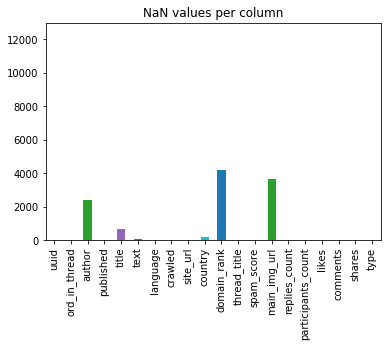

In [24]:
df.isnull().sum().plot(kind='bar', ylim=(0, len(df)), title='NaN values per column')

### Attributes analysis

What is the distribution of fake news labels in our data?

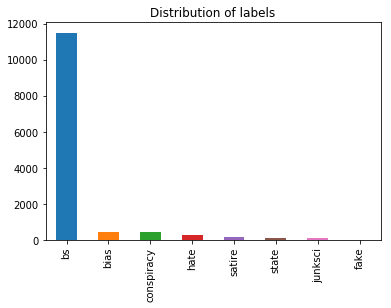

In [25]:
df['type'].value_counts().plot(kind='bar', title='Distribution of labels')